<a href="https://colab.research.google.com/github/AliNikkhah2001/DeepLearning02/blob/main/DL_HW1_P3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Define the personal information
first_name = "Ali"
last_name = "Nikkhah"
student_number = "99102445"

# Create the formatted card
info_card = f'''
╔════════════════════════════╗
║      Personal Info         ║
╠════════════════════════════╣
║ First Name:    {first_name: <12}║
║ Last Name:     {last_name: <12}║
║ Student Number:{student_number: <12}║
╚════════════════════════════╝
'''

# Print the card
print(info_card)



╔════════════════════════════╗
║      Personal Info         ║
╠════════════════════════════╣
║ First Name:    Ali         ║
║ Last Name:     Nikkhah     ║
║ Student Number:99102445    ║
╚════════════════════════════╝



In [6]:
!pip install pandas scikit-learn matplotlib


In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
from scipy import stats




In [8]:
# Load the dataset from 'Heart_Disease_Dataset.csv'
data = pd.read_csv('Heart_Disease_Dataset.csv')



In [9]:

# Print column names (tags)
column_names = data.columns
print("Column Names (Tags):")
for col in column_names:
    print(col)

# Check for missing values (null values) in each column
missing_values = data.isnull().any()
print("\nColumns with Missing Values:")
print(missing_values)


# Check class balance
class_balance = data['target'].value_counts()
print("Class Balance:")
print(class_balance)



Column Names (Tags):
age
sex
chest pain type
resting bp s
cholesterol
fasting blood sugar
resting ecg
max heart rate
exercise angina
oldpeak
ST slope
target

Columns with Missing Values:
age                    False
sex                    False
chest pain type        False
resting bp s           False
cholesterol            False
fasting blood sugar    False
resting ecg            False
max heart rate         False
exercise angina        False
oldpeak                False
ST slope               False
target                 False
dtype: bool
Class Balance:
1    629
0    561
Name: target, dtype: int64


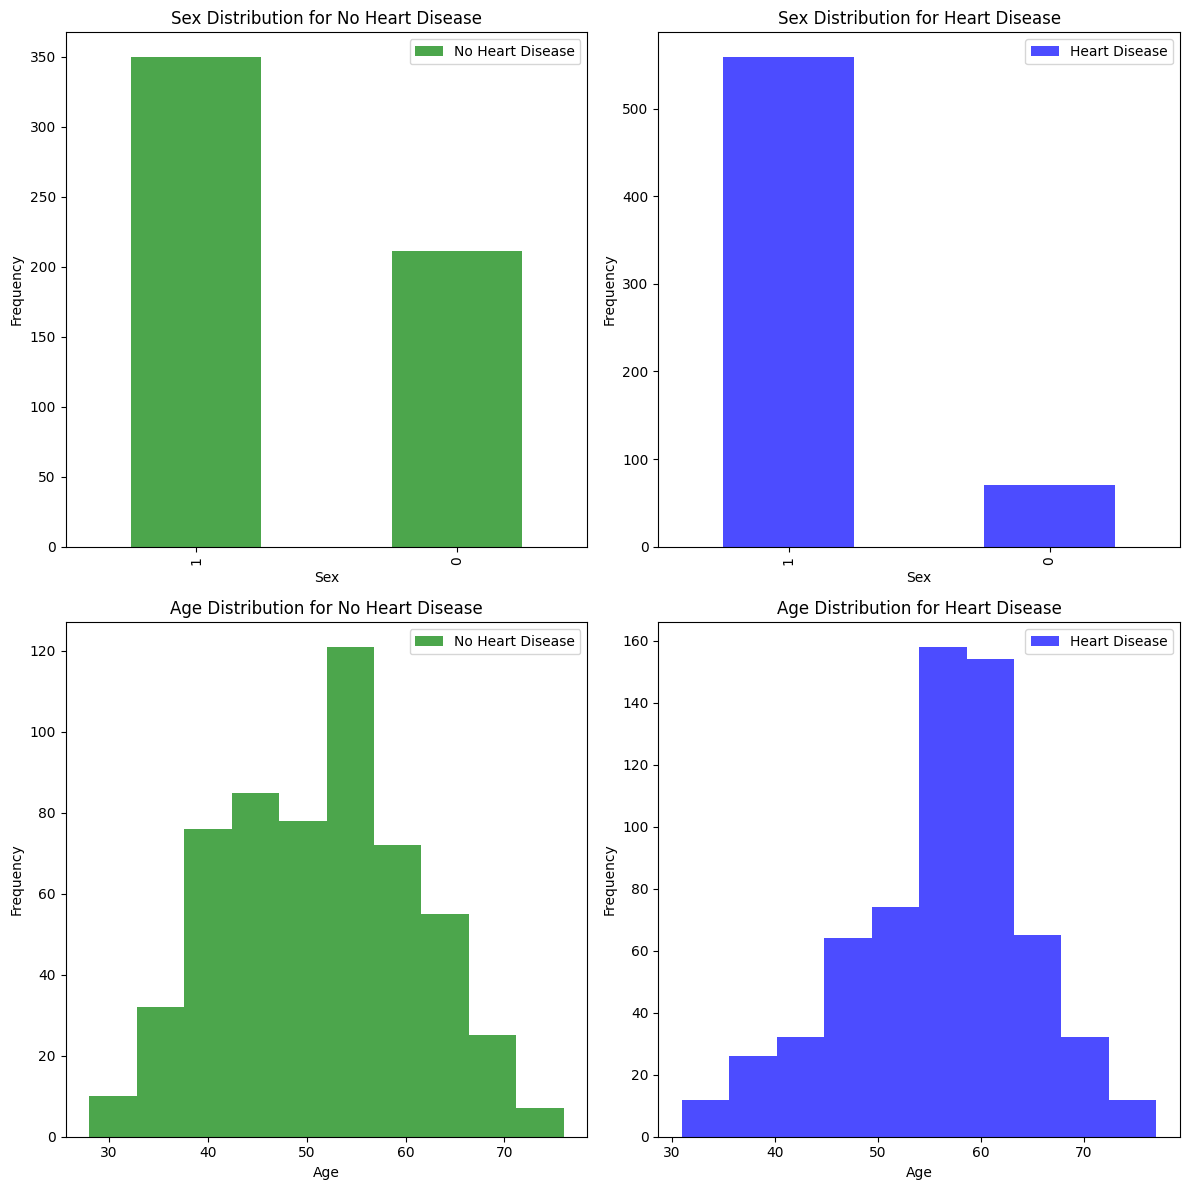

In [10]:
# Data visualization - Sex and Age distribution for both classes
plt.figure(figsize=(12, 12))

# Plot Sex distribution for class 0 (No Heart Disease) in green
plt.subplot(2, 2, 1)
data[data['target'] == 0]['sex'].value_counts().plot(kind='bar', color='green', alpha=0.7, label='No Heart Disease')
plt.title("Sex Distribution for No Heart Disease")
plt.xlabel("Sex")
plt.ylabel("Frequency")
plt.legend()

# Plot Sex distribution for class 1 (Heart Disease) in blue
plt.subplot(2, 2, 2)
data[data['target'] == 1]['sex'].value_counts().plot(kind='bar', color='blue', alpha=0.7, label='Heart Disease')
plt.title("Sex Distribution for Heart Disease")
plt.xlabel("Sex")
plt.ylabel("Frequency")
plt.legend()

# Plot Age distribution for class 0 (No Heart Disease) in green
plt.subplot(2, 2, 3)
plt.hist(data[data['target'] == 0]['age'], color='green', alpha=0.7, label='No Heart Disease')
plt.title("Age Distribution for No Heart Disease")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.legend()

# Plot Age distribution for class 1 (Heart Disease) in blue
plt.subplot(2, 2, 4)
plt.hist(data[data['target'] == 1]['age'], color='blue', alpha=0.7, label='Heart Disease')
plt.title("Age Distribution for Heart Disease")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.legend()

plt.tight_layout()
plt.show()


Outliers:
      age  sex  chest pain type  resting bp s  cholesterol  \
30     53    1                3           145          518   
76     32    1                4           118          529   
109    39    1                2           190          241   
149    54    1                4           130          603   
167    50    1                4           140          231   
242    54    1                4           200          198   
325    46    1                4           100            0   
366    64    0                4           200            0   
371    60    1                4           135            0   
391    51    1                4           140            0   
400    61    1                3           200            0   
450    55    1                3             0            0   
593    61    1                4           190          287   
618    67    0                3           115          564   
704    59    1                1           178          270  

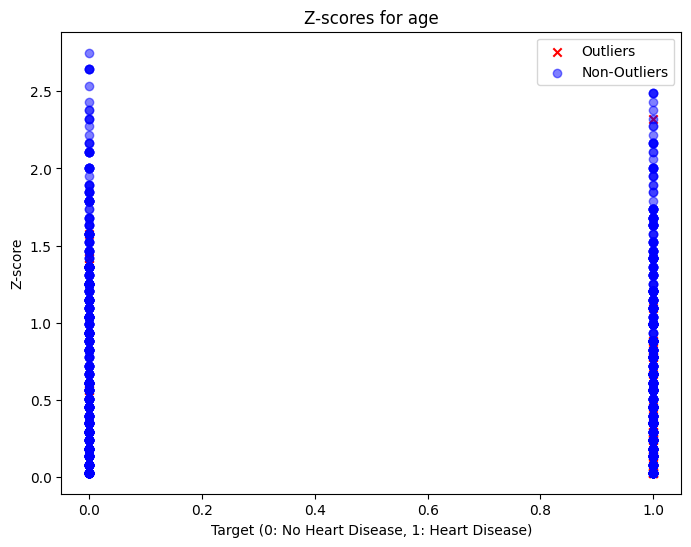

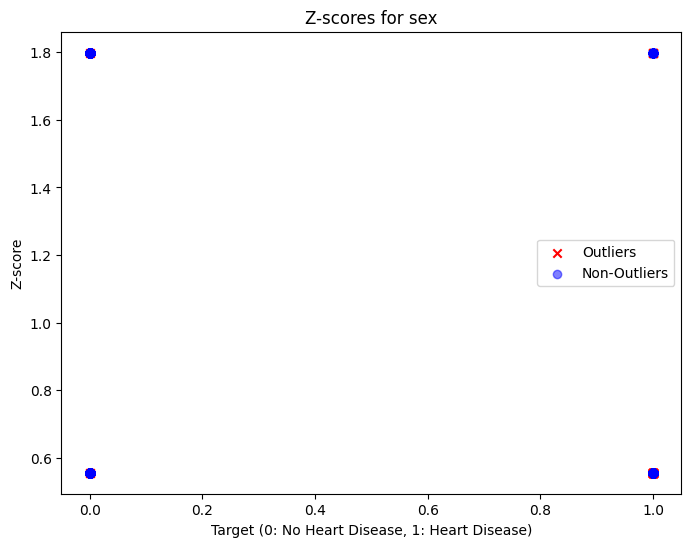

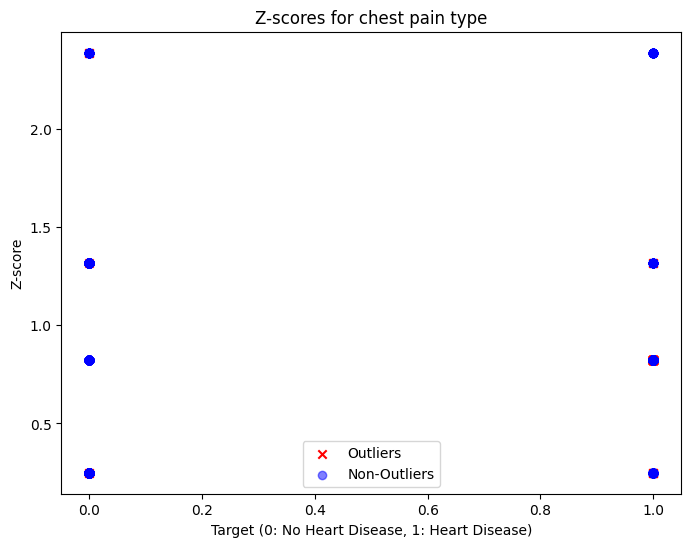

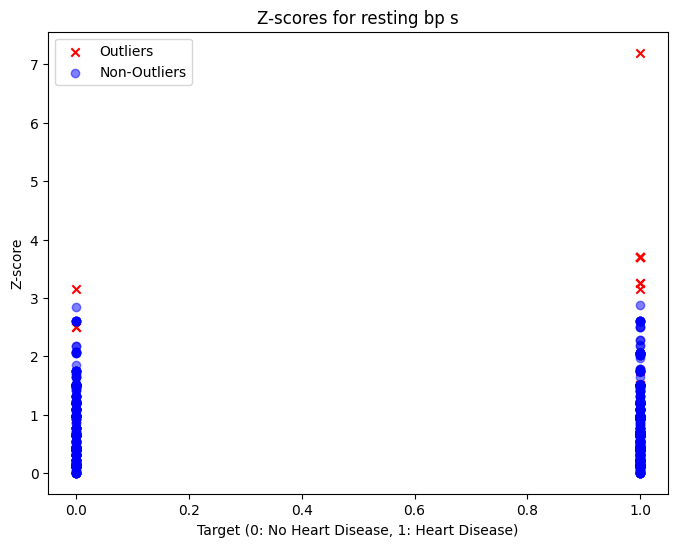

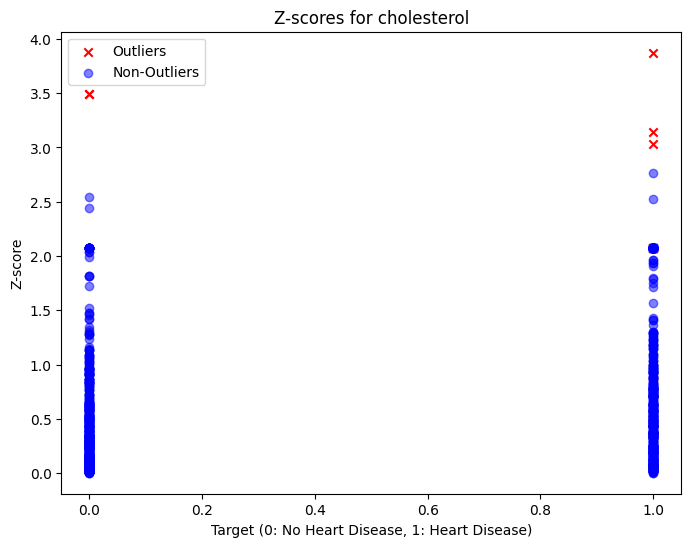

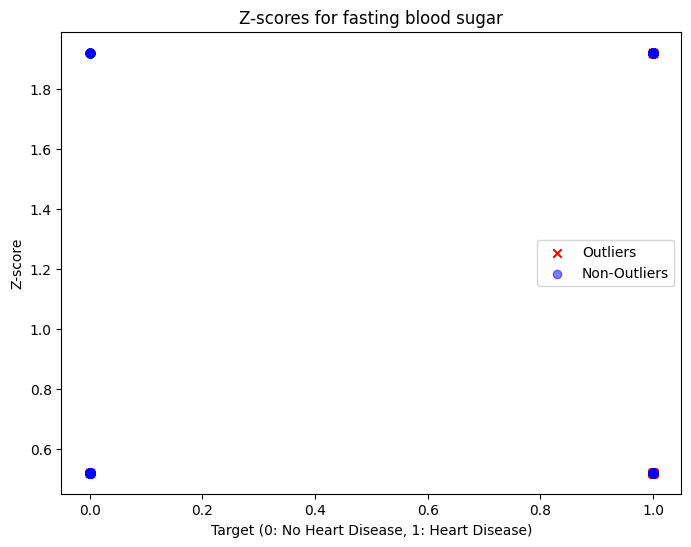

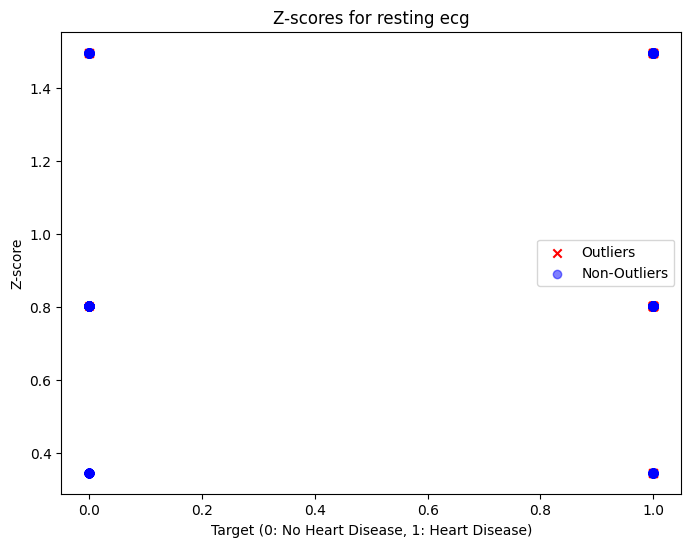

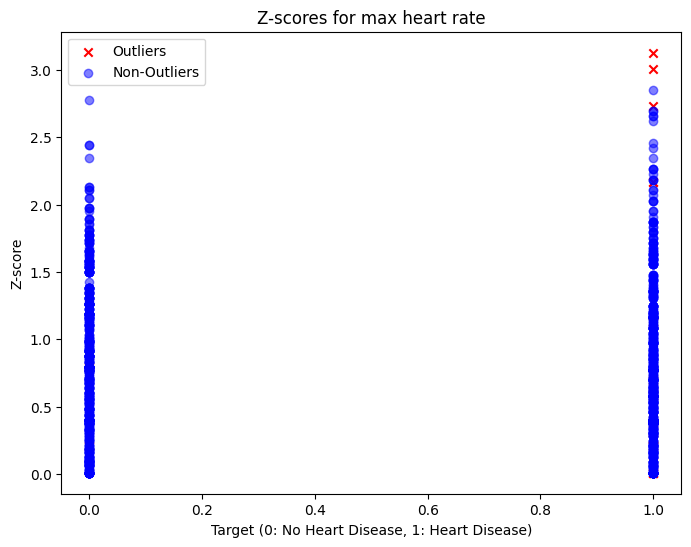

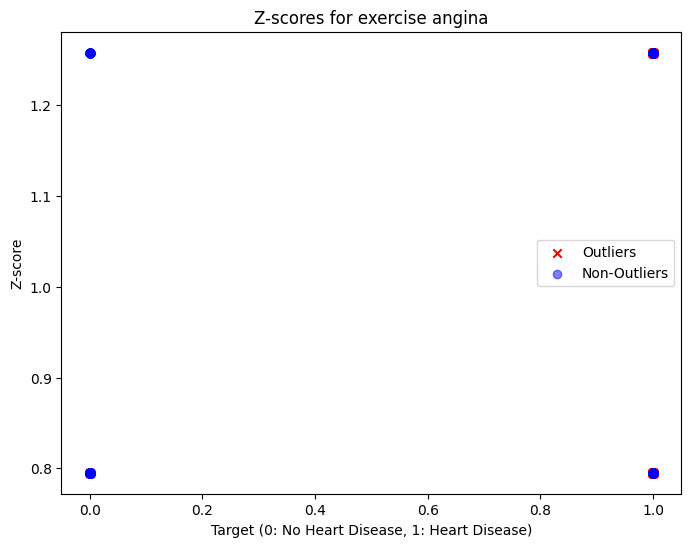

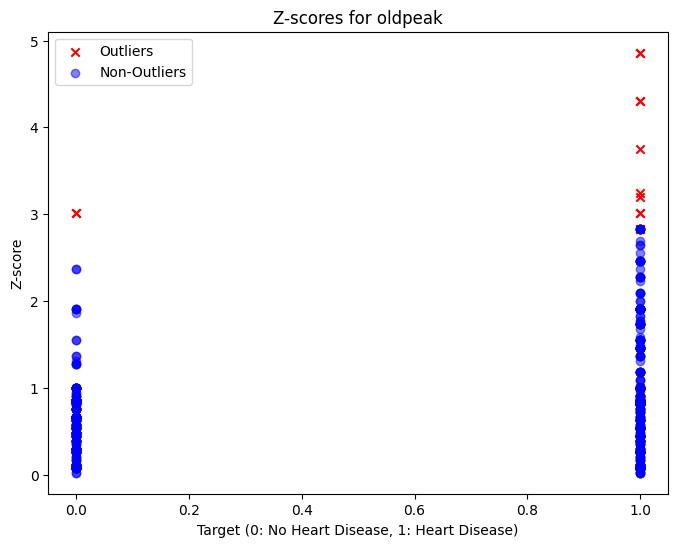

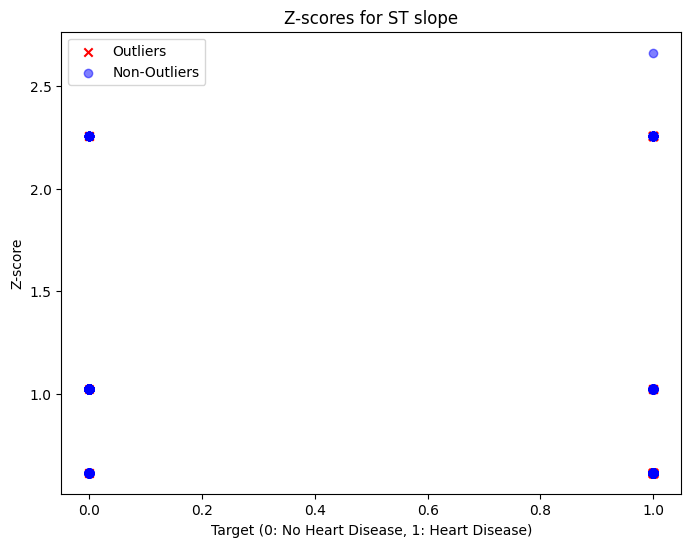

In [11]:
# Calculate Z-scores
z_scores = np.abs(stats.zscore(data))

# Set a threshold for identifying outliers
threshold = 3

# Find outliers
outliers = (z_scores > threshold).any(axis=1)

# Print and identify outliers
outliers_data = data[outliers]
print("Outliers:")
print(outliers_data)

# Create a scatter plot of Z-scores for columns with outliers
for col in data.columns:
    if col != 'target':
        plt.figure(figsize=(8, 6))
        plt.scatter(data[outliers]['target'], z_scores[outliers][col], c='red', marker='x', label='Outliers')
        plt.scatter(data[~outliers]['target'], z_scores[~outliers][col], c='blue', alpha=0.5, label='Non-Outliers')
        plt.title(f"Z-scores for {col}")
        plt.xlabel("Target (0: No Heart Disease, 1: Heart Disease)")
        plt.ylabel("Z-score")
        plt.legend()
        plt.show()

# Remove outliers from the dataset
data = data[~outliers]
# Remove outlier data with Z-test with threshold 3
z_scores = np.abs(stats.zscore(data))
outliers = (z_scores > 3).all(axis=1)
outliers_data = data[outliers]  # Extract the outlier data



In [12]:

# Normalize numerical data
scaler = StandardScaler()
# Define the numerical columns
numerical_cols = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])


<ipython-input-12-2c56b9b668d2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[numerical_cols] = scaler.fit_transform(data[numerical_cols])


In [13]:

# Split the data into training and testing sets (70% train, 30% test)
X = data.drop('target', axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train and evaluate SVM models
kernels = ['linear', 'rbf', 'poly']
for kernel in kernels:
    clf = SVC(kernel=kernel)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Print classification report and accuracy
    print(f"Results for {kernel} kernel:")
    print(classification_report(y_test, y_pred))
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"Precision: {precision:.2f}")


Results for linear kernel:
              precision    recall  f1-score   support

           0       0.86      0.77      0.81       168
           1       0.80      0.88      0.84       181

    accuracy                           0.83       349
   macro avg       0.83      0.83      0.83       349
weighted avg       0.83      0.83      0.83       349

Accuracy: 0.83
F1 Score: 0.84
Recall: 0.88
Precision: 0.80
Results for rbf kernel:
              precision    recall  f1-score   support

           0       0.89      0.76      0.82       168
           1       0.80      0.91      0.85       181

    accuracy                           0.84       349
   macro avg       0.85      0.84      0.84       349
weighted avg       0.85      0.84      0.84       349

Accuracy: 0.84
F1 Score: 0.85
Recall: 0.91
Precision: 0.80
Results for poly kernel:
              precision    recall  f1-score   support

           0       0.85      0.82      0.83       168
           1       0.84      0.87      0.85

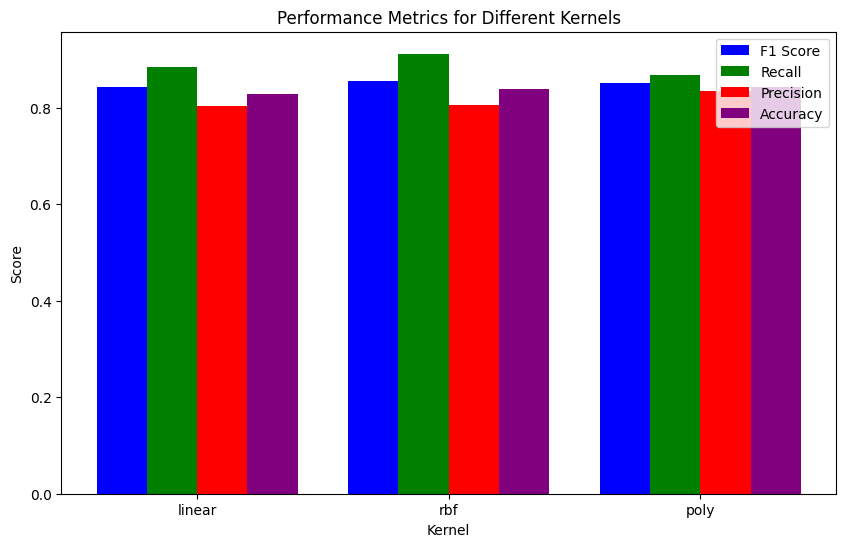

In [14]:

metrics = {'F1 Score': [], 'Recall': [], 'Precision': [], 'Accuracy': []}
for kernel in kernels:
    clf = SVC(kernel=kernel)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    metrics['F1 Score'].append(f1)
    metrics['Recall'].append(recall)
    metrics['Precision'].append(precision)
    metrics['Accuracy'].append(accuracy)

# Create a figure and set the width of each bar
fig, ax = plt.subplots(figsize=(10, 6))

# Define the width of each bar and the position for each set of bars
width = 0.2
x = np.arange(len(kernels))

# Plot the bars for each metric close to each other
for i, (metric, color) in enumerate(zip(['F1 Score', 'Recall', 'Precision', 'Accuracy'], ['blue', 'green', 'red', 'purple'])):
    ax.bar(x + i * width, metrics[metric], width=width, label=metric, color=color)

ax.set_xticks(x + width * 1.5)
ax.set_xticklabels(kernels)

ax.set_xlabel("Kernel")
ax.set_ylabel("Score")
ax.set_title("Performance Metrics for Different Kernels")
ax.legend()

plt.show()